In [63]:
import numpy as np
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder


In [64]:
import os
print(os.getcwd())
import os

# Load the dataset
bike_data = pd.read_csv("Bicycle_Thefts_Open_Data.csv")

/Users/benjaminlefebvre/Documents/Software Engineering/Semester 5/Data Warehouse/DataWareHousing_FinalProject/python_server


-----------------------------------
-------- Data exploration ---------
-----------------------------------


--------------------------
-------- Summary ---------
--------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37178 entries, 0 to 37177
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   OBJECTID           37178 non-null  int64  
 1   EVENT_UNIQUE_ID    37178 non-null  object 
 2   PRIMARY_OFFENCE    37178 non-null  object 
 3   OCC_DATE           37178 non-null  object 
 4   OCC_YEAR           37178 non-null  int64  
 5   OCC_MONTH          37178 non-null  object 
 6   OCC_DOW            37178 non-null  object 
 7   OCC_DAY            37178 non-null  int64  
 8   OCC_DOY            37178 non-null  int64  
 9   OCC_HOUR           37178 non-null  int64  
 10  REPORT_DATE        37178 non-null  object 
 11  REPORT_YEAR        37178 non-null  int64  
 12  REPORT_MONTH       371

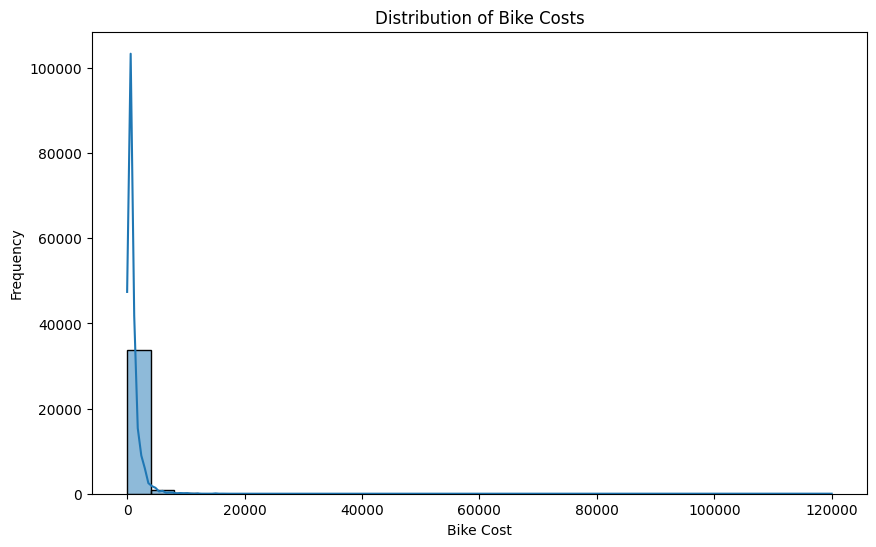


--------------------------------------
-------- Correlation heatmap ---------
--------------------------------------



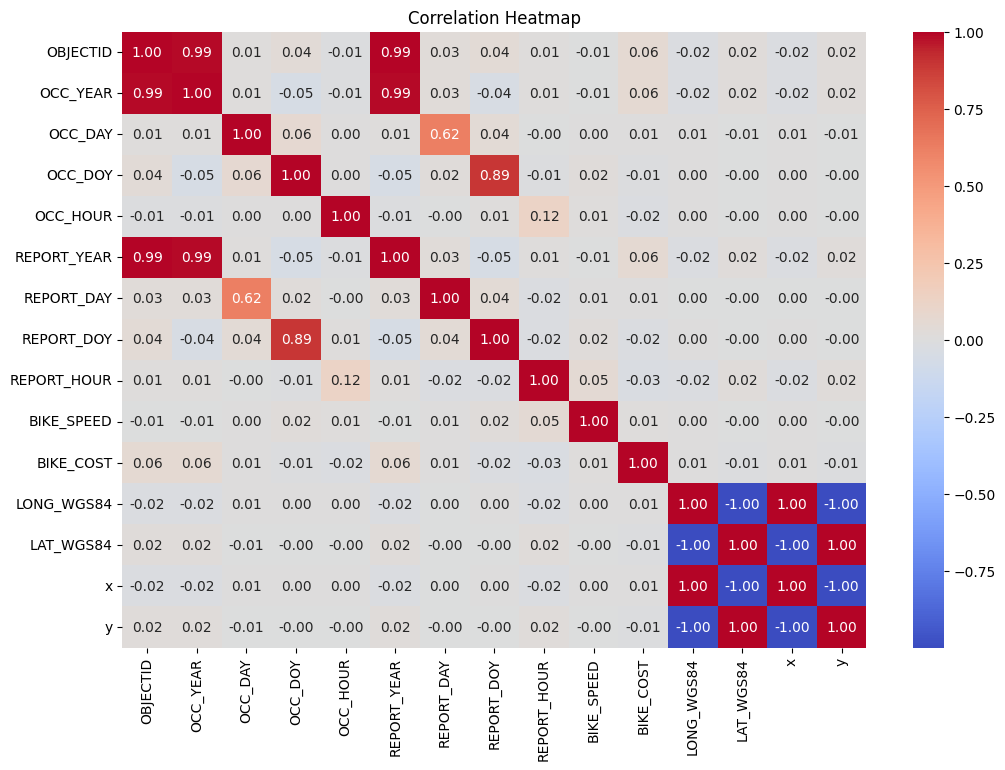


-------------------------------------------------
-------- Histogram of mean of BIKE_COST ---------
-------------------------------------------------



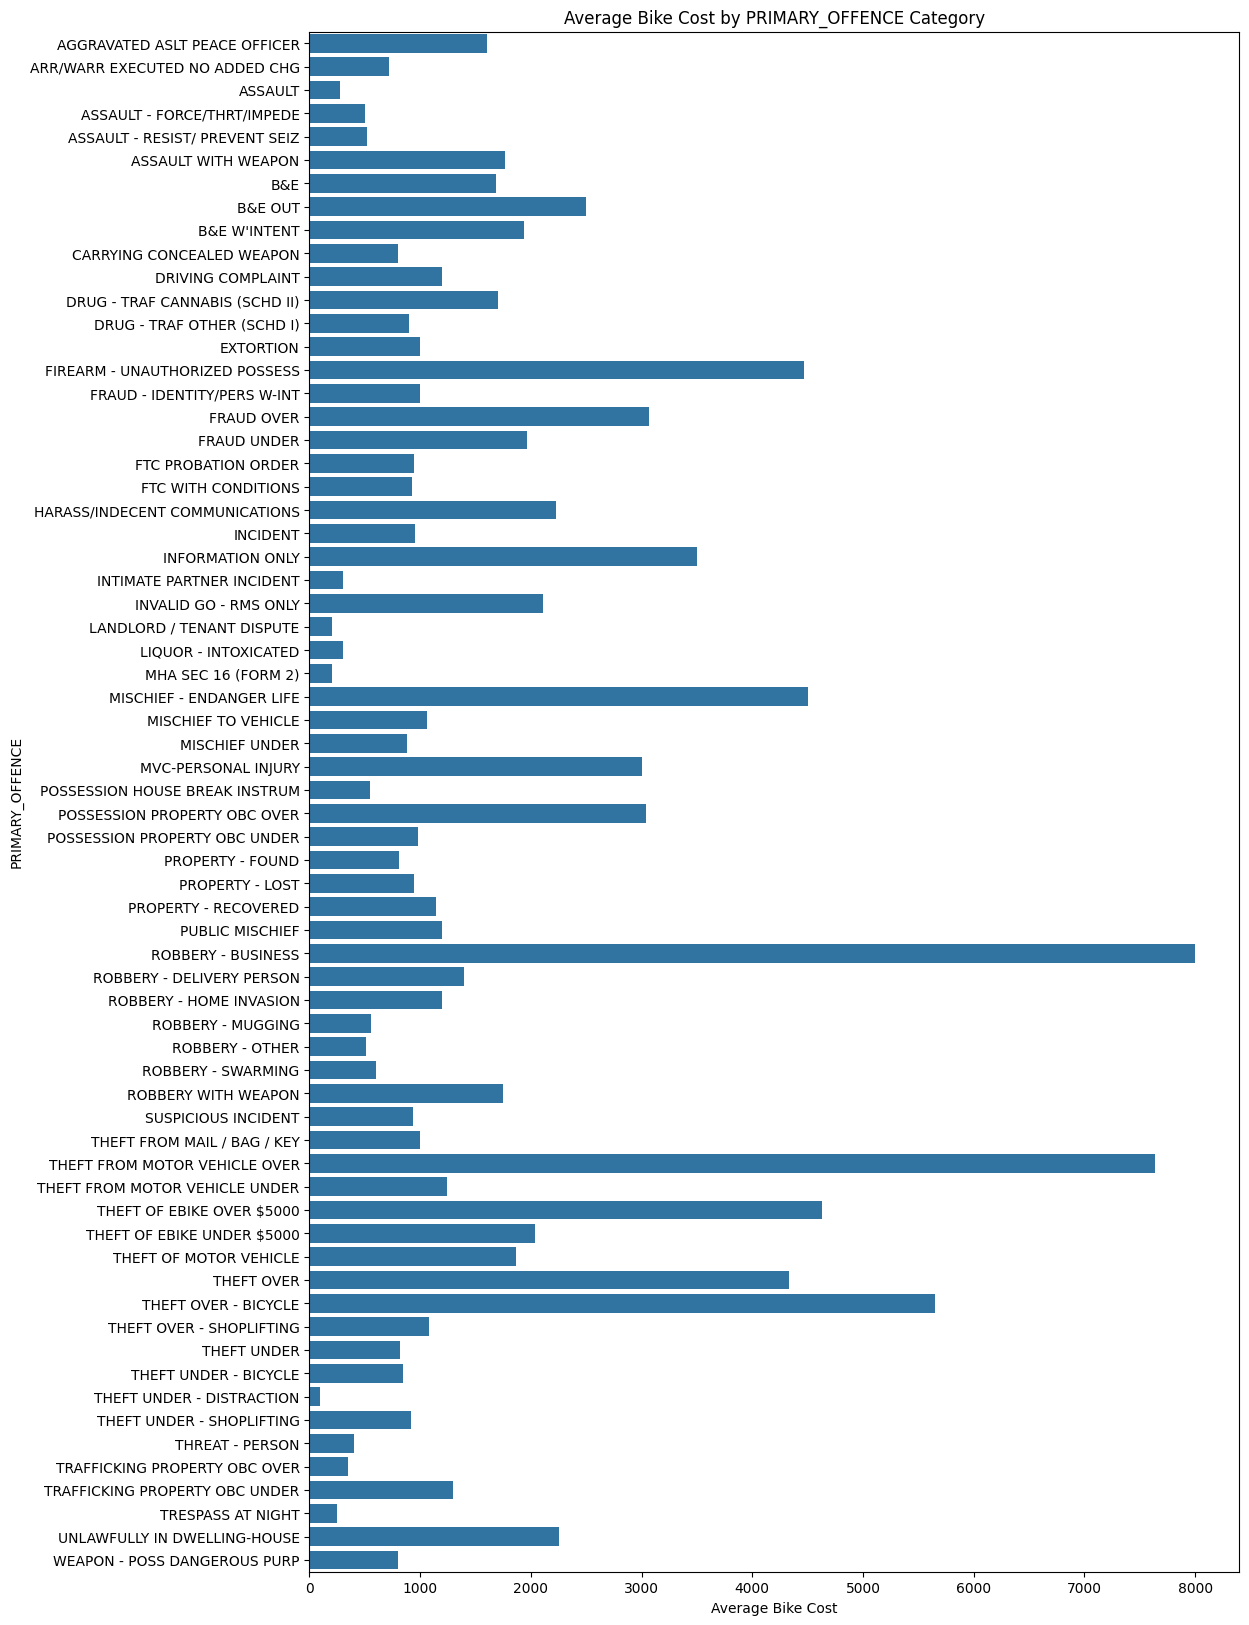

In [65]:
## 1 -  Data exploration (Benjamin Lefebvre - 301234587)

# a) Load and describe data elements (columns), provide descriptions & types, ranges and values of elements as appropriate - use pandas, numpy and any other python packages.
# b) Statistical assessments including means, averages, and correlations.
# c) Missing data evaluations
# d) Graphs and visualizations

print("-----------------------------------")
print("-------- Data exploration ---------")
print("-----------------------------------")
print("")

# Quick summary of the dataset
print("")
print("--------------------------")
print("-------- Summary ---------")
print("--------------------------")
print("")

print(bike_data.info())

# Statistical summary of the dataset
print("")
print("------------------------------------------")
print("-------- Statistical Assessments ---------")
print("------------------------------------------")
print("")

print(bike_data.describe())

# Display the first few rows of the dataset
print("")
print("---------------------------------")
print("-------- First Few Rows ---------")
print("---------------------------------")
print("")
print(bike_data.head())

# Display the data range of each column
print("")
print("-------------------------------------")
print("-------- Columns Data Range ---------")
print("-------------------------------------")
print("")
for column in bike_data.columns:
    if bike_data[column].dtype in [np.int64, np.float64]:
        min_value = bike_data[column].min()
        max_value = bike_data[column].max()
        print(f"{column}: Min: {min_value}, Max: {max_value}")
    else:
        unique_values = bike_data[column].unique()
        print(f"Unique values in column '{column}':")
        print(unique_values)

    print("")

# Display the data types of each column
print("")
print("------------------------------------")
print("-------- Columns Data Type ---------")
print("------------------------------------")
print("")
print(bike_data.dtypes)

# Check for missing values
print("")
print("-------------------------------")
print("-------- Missing Data ---------")
print("-------------------------------")
print("")
print(bike_data.isnull().sum())

# Select only numeric columns for correlation matrix
numeric_data = bike_data.select_dtypes(include=[np.number])

# Correlation matrix
print("")
print("-------------------------------------")
print("-------- Correlation Matrix ---------")
print("-------------------------------------")
print("")
print(numeric_data.corr())

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of bike costs
print("")
print("------------------------------------------")
print("-------- Histogram of bike costs ---------")
print("------------------------------------------")
print("")
plt.figure(figsize=(10, 6))
sns.histplot(bike_data['BIKE_COST'], bins=30, kde=True)
plt.title('Distribution of Bike Costs')
plt.xlabel('Bike Cost')
plt.ylabel('Frequency')
plt.show()

# Correlation heatmap
print("")
print("--------------------------------------")
print("-------- Correlation heatmap ---------")
print("--------------------------------------")
print("")
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Histogram of mean of BIKE_COST based on PRIMARY_OFFENCE
print("")
print("-------------------------------------------------")
print("-------- Histogram of mean of BIKE_COST ---------")
print("-------------------------------------------------")
print("")

# Calculate the mean BIKE_COST for each PRIMARY_OFFENCE category
mean_bike_cost_by_offence = bike_data.groupby('PRIMARY_OFFENCE')['BIKE_COST'].mean()

# Remove categories with NaN values
mean_bike_cost_by_offence = mean_bike_cost_by_offence.dropna()

plt.figure(figsize=(12, 20))
sns.barplot(x=mean_bike_cost_by_offence.values, y=mean_bike_cost_by_offence.index)
plt.title('Average Bike Cost by PRIMARY_OFFENCE Category')
plt.xlabel('Average Bike Cost')
plt.ylabel('PRIMARY_OFFENCE')
plt.show()

In [66]:
# Keep only the relevant columns
relevant_columns = [
   'OCC_YEAR', 'OCC_MONTH', 'OCC_DOW', 'DIVISION', 'LOCATION_TYPE',
    'PREMISES_TYPE', 'BIKE_TYPE', 'BIKE_COST', 'STATUS',
    'NEIGHBOURHOOD_158'
]

filtered_bike_data = bike_data[relevant_columns]

# Save the modified dataset
filtered_file_path = 'Bicycle_Thefts_Filtered.csv'
filtered_bike_data.to_csv(filtered_file_path, index=False)


In [67]:
bike_dataf = pd.read_csv("Bicycle_Thefts_Filtered.csv")
bike_dataf.head().T

,0,1,2,3,4
OCC_YEAR,2014,2013,2014,2013,2013
OCC_MONTH,January,December,January,September,December
OCC_DOW,Wednesday,Thursday,Wednesday,Monday,Wednesday
DIVISION,D14,D14,D14,D14,D51
LOCATION_TYPE,"Single Home, House (Attach Garage, Cottage, Mo...",Other Commercial / Corporate Places (For Profi...,"Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)"
PREMISES_TYPE,House,Commercial,Apartment,Apartment,Apartment
BIKE_TYPE,RG,RC,MT,MT,MT
BIKE_COST,NaN,1300.0,NaN,750.0,1500.0
STATUS,RECOVERED,STOLEN,STOLEN,STOLEN,STOLEN
NEIGHBOURHOOD_158,Palmerston-Little Italy (80),Harbourfront-CityPlace (165),South Parkdale (85),Kensington-Chinatown (78),Downtown Yonge East (168)


In [68]:
bike_dataf.isnull().sum()

OCC_YEAR                0
OCC_MONTH               0
OCC_DOW                 0
DIVISION                0
LOCATION_TYPE           0
PREMISES_TYPE           0
BIKE_TYPE               0
BIKE_COST            2490
STATUS                  0
NEIGHBOURHOOD_158       0
dtype: int64

In [69]:
print("Unique values in 'STATUS' before mapping:", bike_dataf['STATUS'].unique())


Unique values in 'STATUS' before mapping: ['RECOVERED' 'STOLEN' 'UNKNOWN']


In [70]:
# Fill numerical columns with their respective mean values
numerical_columns = bike_dataf.select_dtypes(include=['int64', 'float64']).columns
bike_dataf[numerical_columns] = filtered_bike_data[numerical_columns].fillna(
    bike_dataf[numerical_columns].mean()
)

# Save the updated dataset
filled_numerical_file_path = 'Bicycle_Thefts_Filled_Numerical.csv'
filtered_bike_data.to_csv(filled_numerical_file_path, index=False)

filled_numerical_file_path


'Bicycle_Thefts_Filled_Numerical.csv'

In [71]:

# Remove rows where Status is 'UNKNOWN'
bike_dataf = bike_dataf[bike_dataf['STATUS'].fillna('').str.upper() != 'UNKNOWN']

# Fill the "BIKE_COST" column with its mean
# Fill numerical columns with their respective mean values
numerical_columns = bike_dataf.select_dtypes(include=['int64', 'float64']).columns
bike_dataf[numerical_columns] = filtered_bike_data[numerical_columns].fillna(
    bike_dataf[numerical_columns].mean()
)

# Save the updated dataset
filled_numerical_file_path = 'Bicycle_Thefts_Filled_Numerical.csv'
filtered_bike_data.to_csv(filled_numerical_file_path, index=False)

filled_numerical_file_path



'Bicycle_Thefts_Filled_Numerical.csv'

In [72]:
bike_dataf.head().T



,0,1,2,3,4
OCC_YEAR,2014,2013,2014,2013,2013
OCC_MONTH,January,December,January,September,December
OCC_DOW,Wednesday,Thursday,Wednesday,Monday,Wednesday
DIVISION,D14,D14,D14,D14,D51
LOCATION_TYPE,"Single Home, House (Attach Garage, Cottage, Mo...",Other Commercial / Corporate Places (For Profi...,"Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)","Apartment (Rooming House, Condo)"
PREMISES_TYPE,House,Commercial,Apartment,Apartment,Apartment
BIKE_TYPE,RG,RC,MT,MT,MT
BIKE_COST,999.776002,1300.0,999.776002,750.0,1500.0
STATUS,RECOVERED,STOLEN,STOLEN,STOLEN,STOLEN
NEIGHBOURHOOD_158,Palmerston-Little Italy (80),Harbourfront-CityPlace (165),South Parkdale (85),Kensington-Chinatown (78),Downtown Yonge East (168)


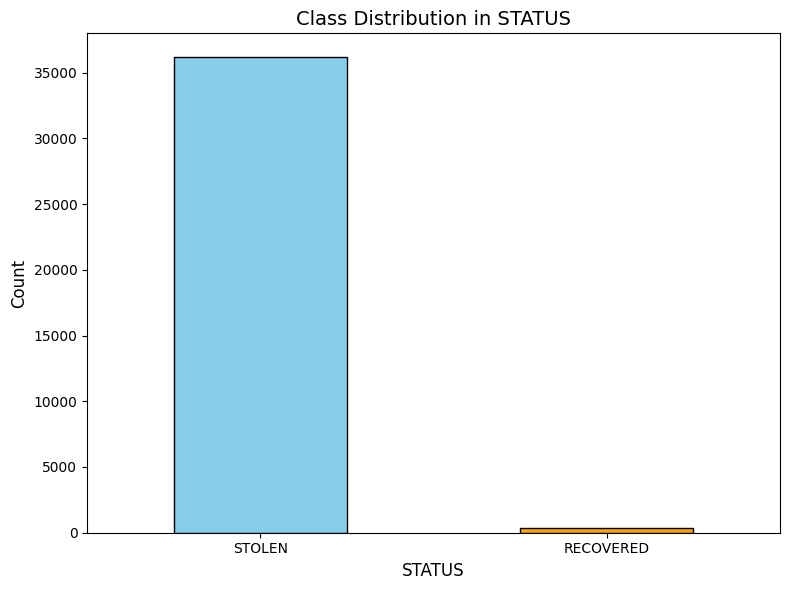

In [73]:
# Plot the class distribution graphically
class_distribution = bike_dataf['STATUS'].value_counts()
# Create a bar plot
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['skyblue', 'orange'], edgecolor='black')

# Add labels and title
plt.title('Class Distribution in STATUS', fontsize=14)
plt.xlabel('STATUS', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Show the plot
plt.tight_layout()
plt.show()







In [74]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical features in bike_dataf
from sklearn.preprocessing import LabelEncoder

# Map STATUS values to numeric labels
status_mapping = {'STOLEN': 0, 'RECOVERED': 1}
bike_dataf['STATUS'] = bike_dataf['STATUS'].map(status_mapping)

# Verify the mapping
print("Updated STATUS column value counts:")
print(bike_dataf['STATUS'].value_counts())

# Encode other categorical features in the dataset
encoded_bike_dataf = bike_dataf.copy()

# Identify categorical columns
categorical_columns = encoded_bike_dataf.select_dtypes(include=['object']).columns

# Apply label encoding to all categorical columns
label_encoders = {}
for col in categorical_columns:
    encoder = LabelEncoder()
    encoded_bike_dataf[col] = encoder.fit_transform(encoded_bike_dataf[col].astype(str))
    label_encoders[col] = encoder  # Store the encoder for potential inverse transformation

# Verify the encoded dataset
encoded_bike_dataf.head()


Updated STATUS column value counts:
STATUS
0    36179
1      389
Name: count, dtype: int64


,OCC_YEAR,OCC_MONTH,OCC_DOW,DIVISION,LOCATION_TYPE,PREMISES_TYPE,BIKE_TYPE,BIKE_COST,STATUS,NEIGHBOURHOOD_158
0,2014,4,6,3,35,3,7,999.776002,1,109
1,2013,2,4,3,19,1,5,1300.000000,0,57
2,2014,4,6,3,0,0,3,999.776002,0,124
3,2013,11,1,3,0,0,3,750.000000,0,74
4,2013,2,6,12,0,0,3,1500.000000,0,36


In [75]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in the encoded dataset
numerical_columns = encoded_bike_dataf.select_dtypes(include=['int64']).columns.drop('STATUS')

# Apply Standard Scaling to numerical columns
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(encoded_bike_dataf[numerical_columns])

# Create a DataFrame for scaled numerical data
scaled_numerical_df = pd.DataFrame(scaled_numerical_data, columns=numerical_columns, index=encoded_bike_dataf.index)

# Replace numerical columns in the original dataset with scaled values
scaled_bike_dataf = encoded_bike_dataf.copy()
scaled_bike_dataf[numerical_columns] = scaled_numerical_df

# Verify the scaled dataset
scaled_bike_dataf.head()
# Check unique values in STATUS column
print("Unique values in 'STATUS':", scaled_bike_dataf['STATUS'].unique())


Unique values in 'STATUS': [1 0]


In [76]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Separate features and target
X = scaled_bike_dataf.drop('STATUS', axis=1)
y = scaled_bike_dataf['STATUS'].astype(int)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ensure target column is integer
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train a model on oversampled data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Predict and evaluate for SMOTE
y_pred_smote = model_smote.predict(X_test)
print("=== SMOTE (Oversampling Minority) ===")
print("Classification Report:\n", classification_report(y_test, y_pred_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote))
print("ROC AUC Score:", roc_auc_score(y_test, model_smote.predict_proba(X_test)[:, 1]))

# Undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Train a model on undersampled data
model_under = RandomForestClassifier(random_state=42)
model_under.fit(X_train_under, y_train_under)

# Predict and evaluate for undersampling
y_pred_under = model_under.predict(X_test)
print("\n=== Undersampling (Majority Class Reduced) ===")
print("Classification Report:\n", classification_report(y_test, y_pred_under))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_under))
print("ROC AUC Score:", roc_auc_score(y_test, model_under.predict_proba(X_test)[:, 1]))


=== SMOTE (Oversampling Minority) ===
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7236
           1       0.43      0.12      0.18        78

    accuracy                           0.99      7314
   macro avg       0.71      0.56      0.59      7314
weighted avg       0.98      0.99      0.99      7314

Confusion Matrix:
 [[7224   12]
 [  69    9]]
ROC AUC Score: 0.7245343793851257

=== Undersampling (Majority Class Reduced) ===
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.69      0.82      7236
           1       0.02      0.68      0.04        78

    accuracy                           0.69      7314
   macro avg       0.51      0.69      0.43      7314
weighted avg       0.98      0.69      0.81      7314

Confusion Matrix:
 [[5008 2228]
 [  25   53]]
ROC AUC Score: 0.7677982948505335


In [77]:

from imblearn.combine import SMOTEENN


# Separate features and target
X = scaled_bike_dataf.drop('STATUS', axis=1)
y = scaled_bike_dataf['STATUS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE + ENN (Hybrid Oversampling and Cleaning)
smote_enn = SMOTEENN(random_state=42)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

# Train a model with class weights on the hybrid resampled data
model_smote_enn = RandomForestClassifier(class_weight='balanced', random_state=42)
model_smote_enn.fit(X_train_smote_enn, y_train_smote_enn)

# Predict and evaluate the model
y_pred_smote_enn = model_smote_enn.predict(X_test)

# Evaluation metrics
print("=== SMOTE + ENN with Class Weights ===")
print("Classification Report:\n", classification_report(y_test, y_pred_smote_enn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_smote_enn))
print("ROC AUC Score:", roc_auc_score(y_test, model_smote_enn.predict_proba(X_test)[:, 1]))

=== SMOTE + ENN with Class Weights ===
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      7236
           1       0.39      0.14      0.21        78

    accuracy                           0.99      7314
   macro avg       0.69      0.57      0.60      7314
weighted avg       0.98      0.99      0.99      7314

Confusion Matrix:
 [[7219   17]
 [  67   11]]
ROC AUC Score: 0.7199313262746101


In [78]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

def calculate_metrics(classifier, X_val, y_val, classifier_description):
    """
    Calculate and display classification metrics for a given classifier.
    """
    # Predict labels
    y_pred_val = classifier.predict(X_val)

    # Calculate metrics
    val_accuracy = accuracy_score(y_val, y_pred_val)
    val_precision = precision_score(y_val, y_pred_val, average='binary')
    val_recall = recall_score(y_val, y_pred_val, average='binary')
    val_f1 = f1_score(y_val, y_pred_val, average='binary')

    # Display metrics
    print(f'{classifier_description}:')
    print(f'Precision: {val_precision:.4f}, Recall: {val_recall:.4f}, F1 Score: {val_f1:.4f}')
    print(f'Accuracy: {val_accuracy:.4f}\n')
    print('Classification Report:')
    print(classification_report(y_val, y_pred_val))
    
    # Display confusion matrix
    cm = confusion_matrix(y_val, y_pred_val)
    print('Confusion Matrix:')
    print(cm)
    
    return val_accuracy, val_precision, val_recall, val_f1


In [79]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

def plot_roc_auc(classifier, X_val, y_val, classifier_description):
    """
    Calculate and plot the ROC-AUC curve for a given classifier.
    """
    # Predict probabilities
    y_pred_proba_val = classifier.predict_proba(X_val)[:, 1]

    # Calculate ROC curve
    fpr_val, tpr_val, thresholds_val = roc_curve(y_val, y_pred_proba_val)

    # Calculate AUC
    roc_auc_val = roc_auc_score(y_val, y_pred_proba_val)

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_val, tpr_val, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_val:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{classifier_description}: Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()

    return roc_auc_val


Logistic Regression:
Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000
Accuracy: 0.9893

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7236
           1       0.00      0.00      0.00        78

    accuracy                           0.99      7314
   macro avg       0.49      0.50      0.50      7314
weighted avg       0.98      0.99      0.98      7314

Confusion Matrix:
[[7236    0]
 [  78    0]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_cla

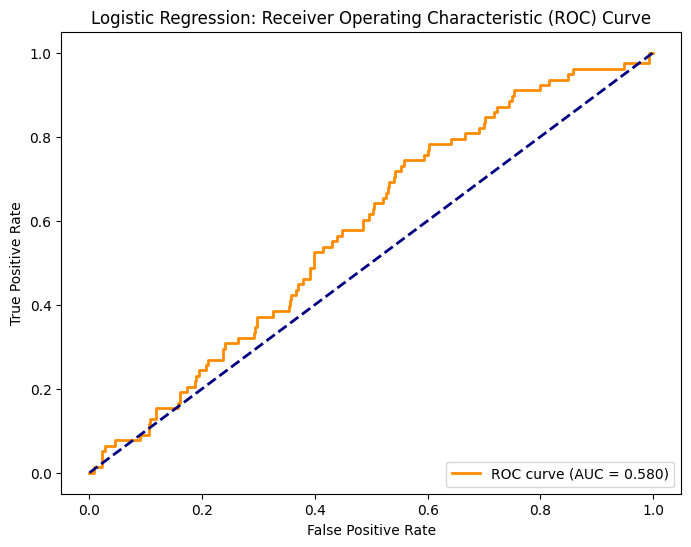

0.5804772434125668

In [80]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Calculate and display metrics
calculate_metrics(log_reg, X_test, y_test, 'Logistic Regression')

# Plot ROC-AUC curve
plot_roc_auc(log_reg, X_test, y_test, 'Logistic Regression')


Logistic Regression with SMOTE:
Precision: 0.0130, Recall: 0.5000, F1 Score: 0.0253
Accuracy: 0.5886

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74      7236
           1       0.01      0.50      0.03        78

    accuracy                           0.59      7314
   macro avg       0.50      0.54      0.38      7314
weighted avg       0.98      0.59      0.73      7314

Confusion Matrix:
[[4266 2970]
 [  39   39]]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


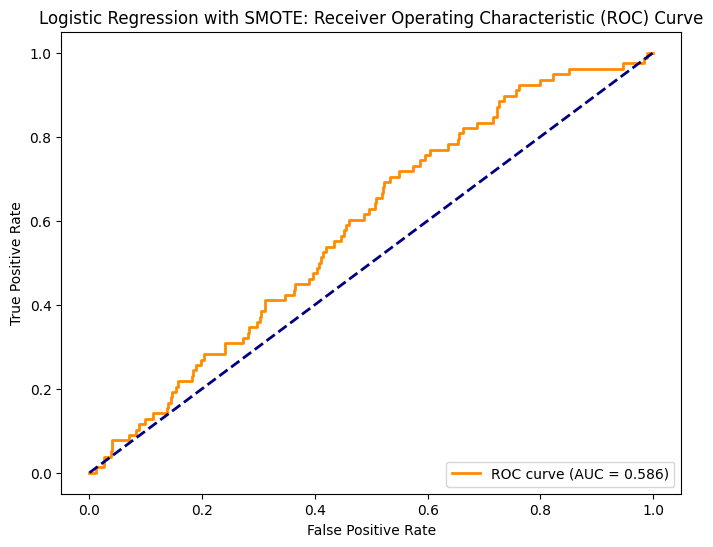

0.585776601323865

In [81]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Initialize and train the logistic regression model
log_reg = LogisticRegression(random_state=42)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE data

log_reg.fit(X_train_smote, y_train_smote)

# Evaluate performance
calculate_metrics(log_reg, X_test, y_test, 'Logistic Regression with SMOTE')
plot_roc_auc(log_reg, X_test, y_test, 'Logistic Regression with SMOTE')


In [82]:
from imblearn.under_sampling import RandomUnderSampler

# Apply undersampling
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Train Logistic Regression on SMOTE data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Evaluate performance
calculate_metrics(rf, X_test, y_test, 'Logistic with Undersampling')
plot_roc_auc(rf, X_test, y_test, 'Logistic with Undersampling')


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NameError: name 'rf' is not defined

c:\Users\novee\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest with SMOTE + ENN:
Precision: 0.1481, Recall: 0.1538, F1 Score: 0.1509
Accuracy: 0.9815

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7236
           1       0.15      0.15      0.15        78

    accuracy                           0.98      7314
   macro avg       0.57      0.57      0.57      7314
weighted avg       0.98      0.98      0.98      7314

Confusion Matrix:
[[7167   69]
 [  66   12]]


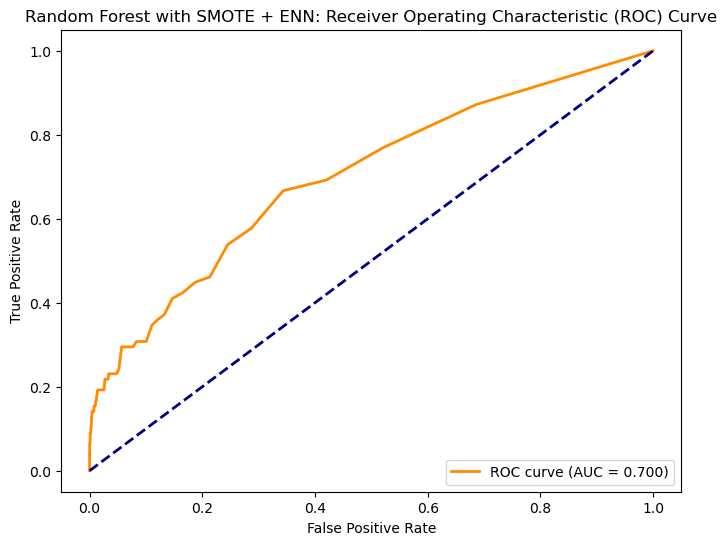

0.6999953934033536

In [ ]:
from imblearn.combine import SMOTEENN

# Apply SMOTE + ENN
smote_enn = SMOTEENN(random_state=42)
X_train_smote_enn, y_train_smote_enn = smote_enn.fit_resample(X_train, y_train)

# Train Random Forest on SMOTE + ENN data
# Train Logistic Regression on SMOTE data
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_smote, y_train_smote)

# Evaluate performance
calculate_metrics(rf, X_test, y_test, 'Logistic with SMOTE + ENN')
plot_roc_auc(rf, X_test, y_test, 'Logistic with SMOTE + ENN')


Random Forest:
Precision: 0.7500, Recall: 0.0769, F1 Score: 0.1395
Accuracy: 0.9899

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7236
           1       0.75      0.08      0.14        78

    accuracy                           0.99      7314
   macro avg       0.87      0.54      0.57      7314
weighted avg       0.99      0.99      0.99      7314

Confusion Matrix:
[[7234    2]
 [  72    6]]


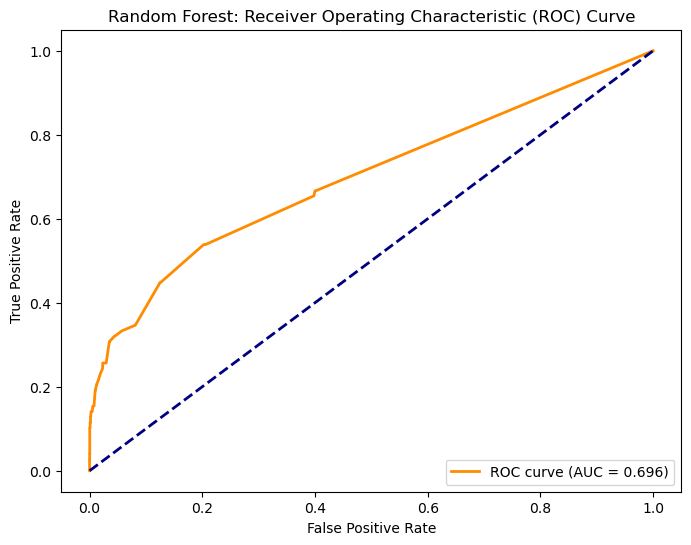

0.6958813482445323

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Calculate and display metrics
calculate_metrics(rf, X_test, y_test, 'Random Forest')

# Plot ROC-AUC curve
plot_roc_auc(rf, X_test, y_test, 'Random Forest')


In [83]:
## 5 - Deploying the model (Benjamin Lefebvre - 301234587)

# a) Using a flask framework arrange to turn your selected machine-learning model into an API.
# b) Using the pickle module, arrange for Serialization & Deserialization of your model.

from flask import Flask, request, jsonify
import pickle

app = Flask(__name__)

# API Routes
# Get options of the location names in the dataset ,the bike_type,the bike cost ,premises, neighbourhood
@app.route('/options', methods=['GET'])
def get_options():
    options = {
        'DIVISION': bike_data['DIVISION'].unique().tolist(),
        'LOCATION_TYPE': bike_data['LOCATION_TYPE'].unique().tolist(),
        'PREMISES_TYPE': bike_data['PREMISES_TYPE'].unique().tolist(),
        'NEIGHBOURHOOD_158': bike_data['NEIGHBOURHOOD_158'].unique().tolist(),
    }
    return jsonify(options)

# Predict the status of a bike theft
# @app.route('/predict', methods=['POST'])
# def predict():
#     data = request.get_json()
    
#     # Convert the input data into a DataFrame
#     input_data = pd.DataFrame(data, index=[0])
    
#     # Preprocess the input data
#     input_data = preprocessor.preprocess(input_data)
    
#     # Make predictions
#     prediction = modeler.best_model.predict(input_data)
    
#     return jsonify({'prediction': prediction[0]})

# Run the app
if __name__ == '__main__':
    app.run(debug=True, port=5001)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with stat
Traceback (most recent call last):
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 3489, in <module>
    main()
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 3482, in main
    globals = debugger.run(setup['file'], None, None, is_module)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2510, in run
    return self._exec(is_module, entry_point_fn, module_name, file, globals, locals)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/pydevd.py", line 2528, in _exec
    globals = pydevd_runpy._run_module_as_main(module_name, alter_argv=False)
  File "/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/debugpy/_vendored/pydevd/_pydevd

SystemExit: 1

/Users/benjaminlefebvre/Library/Python/3.10/lib/python/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
